In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\hyose\\Desktop\\데이터 공부\\ML\\2주차 머신러닝의 시작, 회귀분석\\실습파일'

In [3]:
# 데이터 불러오기
corolla=pd.read_csv("./part2_data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar,nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [7]:
## 가변수 생성
corolla.Fuel_Type.unique() #unique() 데이터의 고유값들이 어떠한 종류가 있는지 확인
#corolla.Fuel_Type.nunique() 고유값의 개수 출력
#corolla.Fuel_Type.value_counts() 종류별 개수 출력
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [8]:
dummy_d

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx=np.array(corolla.Fuel_Type == "Petrol")
d_idx=np.array(corolla.Fuel_Type == "Diesel")
c_idx=np.array(corolla.Fuel_Type == "CNG")
print(p_idx)
print(d_idx)
print(c_idx)

[False False False ...  True  True  True]
[ True  True  True ... False False False]
[False False False ... False False False]


In [10]:
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [12]:
Fuel = pd.DataFrame({'Petrol':dummy_p,'Disesl':dummy_d,'CNG':dummy_c})
Fuel

,Petrol,Disesl,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [42]:
# inplace = True이면 원본 데이터프레임 값을 변경한다. 
corolla_=corolla.drop(['Id','Model','Fuel_Type'],axis=1,inplace= False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

C:\Users\hyose\AppData\Local\Temp/ipykernel_4160/2550050783.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  mlr_data = pd.concat((corolla_,Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disesl,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [43]:
# bias 추가
mlr_data=sm.add_constant(mir_data,has_constant="add")
mlr_data.head()

C:\Users\hyose\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disesl,CNG
0,1.0,1.0,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,1.0,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,1.0,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,1.0,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,1.0,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
#Price컬럼 제외하고 모든 컬럼 조회
feature_colums=mir_data.columns.difference(["Price"])

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [30]:
#y를 제외한 x 컬럼
feature_columns=mlr_data.columns.difference(["Price"])

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 38) (431, 38) (1005,) (431,)


In [31]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

In [33]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     298.6
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:44:49   Log-Likelihood:                -8439.7
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.711e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -399.7516    134.961     -2.962      0.003    -664.601    -134.902
Age_08_04         -119.9621      4.038    -29.709      0.000    -127.886    -112.038
Airbag_1            62.8999    277.556      0.227      0.821    -481.779     607.579
Airbag_2             6.0362    139.256      0.043      0.965    -267.242     279.314
Airco              192.8539     93.056      2.072      0.038      10.239     375.469
Automatic          528.3999    165.185      3.199      0.001     204.239     852.561
Automatic_airco   2502.5138    192.388     13.008      0.000    2124.970    2880.058
BOVAG_Guarantee    427.7497    135.751      3.151      0.002     161.350     694.150
Backseat_Divider  -192.6439    135.041     -1.427      0.154    -457.651      72.363
Boardcomputer     -181.4233    123.468     -1.469      0.142    -423.719      60.872
CD_Player          317.5518    107.703      2.948      0.003     106.194     528.910
CNG              -1091.5665    246.258     -4.433      0.000   -1574.826    -608.307
Central_Lock      -191.1915    164.677     -1.161      0.246    -514.356     131.973
Cylinders           -0.0307      0.002    -13.572      0.000      -0.035      -0.026
Disesl             423.6434    189.118      2.240      0.025      52.517     794.770
Doors               87.9496     41.444      2.122      0.034       6.619     169.280
Gears              237.7313    203.463      1.168      0.243    -161.546     637.008
Guarantee_Period    67.5214     15.383      4.389      0.000      37.333      97.709
HP                  22.8489      3.585      6.373      0.000      15.813      29.885
KM                  -0.0166      0.001    -12.713      0.000      -0.019      -0.014
Met_Color           42.3204     79.017      0.536      0.592    -112.743     197.384
Metallic_Rim       218.5605     98.679      2.215      0.027      24.912     412.209
Mfg_Month         -100.7229     10.735     -9.383      0.000    -121.789     -79.657
Mfg_Year             3.0086      0.830      3.623      0.000       1.379       4.638
Mfr_Guarantee      201.9814     77.591      2.603      0.009      49.717     354.246
Mistlamps          -32.9356    115.704     -0.285      0.776    -259.993     194.122
Petrol             667.9153    207.344      3.221      0.001     261.022    1074.809
Power_Steering      10.8373    306.100      0.035      0.972    -589.855     611.530
Powered_Windows    651.4209    164.876      3.951      0.000     327.867     974.975
Quarterly_Tax       10.8001      1.962      5.504      0.000       6.949      14.651
Radio              147.0325   1111.695      0.132      0.895   -2034.570    2328.635
Radio_cassette    -200.2299   1111.314     -0.180      0.857   -2381.084    1980.624
Sport_Model        298.8814     90.146      3.316      0.001     121.977     475.786
Tow_Bar           -288.

## VIF를 통한 다중공선성 확인 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\hyose\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\hyose\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000e+00,const
1,0.000000e+00,const
2,1.095347e+01,Price
3,inf,Age_08_04
4,3.002400e+15,Mfg_Month
5,inf,Mfg_Year
6,2.400334e+00,KM
7,2.621514e+00,HP
8,1.143778e+00,Met_Color
9,1.121303e+00,Automatic


C:\Users\hyose\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


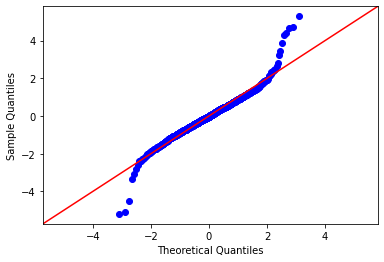

In [46]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

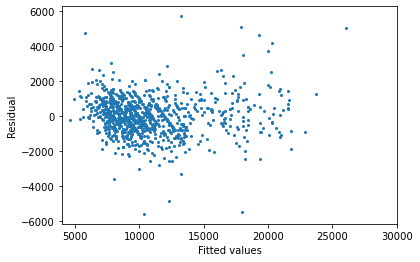

In [53]:
# residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [55]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

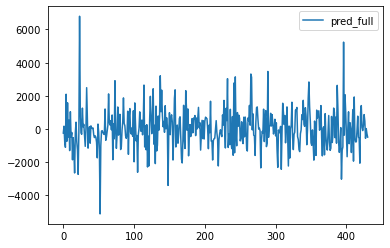

In [56]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
# MSE 성능
mean_squared_error(y_true=test_y,y_pred = pred_y2)

1427776.9436664814

# 변수선택법

In [126]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002620885B8D0>, 'AIC': 19166.200744039113}


In [132]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x26220db85c0>,
 'AIC': 16969.245300968723}

In [181]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.48969030380249023 seconds.
AIC                                                17568.4
model    <statsmodels.regression.linear_model.Regressio...
Name: 211, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


In [182]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [183]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.027924776077270508 seconds.
Processed  630 models on 2 predictors in 0.4807145595550537 seconds.
Processed  7140 models on 3 predictors in 5.790518760681152 seconds.
Total elapsed time: 6.4517505168914795 seconds.


In [184]:
models

,AIC,model
1,17829.429786,<statsmodels.regression.linear_model.Regressio...
2,17568.367339,<statsmodels.regression.linear_model.Regressio...
3,17419.349245,<statsmodels.regression.linear_model.Regressio...


In [185]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1952.
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:18   Log-Likelihood:                -8705.7
No. Observations:                1005   AIC:                         1.742e+04
Df Residuals:                    1001   BIC:                         1.744e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0240      0.001    -16.783      0.000      -0.027      -0.021
Mfg_Year    1474.0677     38.960     37.835      0.000    1397.615    1550.521
Weight        18.9237      0.978     19.343      0.000      17.004      20.844
const      -2.956e+06   7.74e+04    -38.180      0.000   -3.11e+06    -2.8e+06
==============================================================================
Omnibus:                      199.189   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2209.198
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                      10.177   Cond. No.                     1.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90786
full model AIC:  17017.04665
fullmodel MSE:  13420074.50417
selected model Rsquared:  0.85404
selected model AIC:  17419.34924
selected model MSE:  13420074.50417


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 'argmin' is deprecated, use 

Text(0,0.5,'BIC')

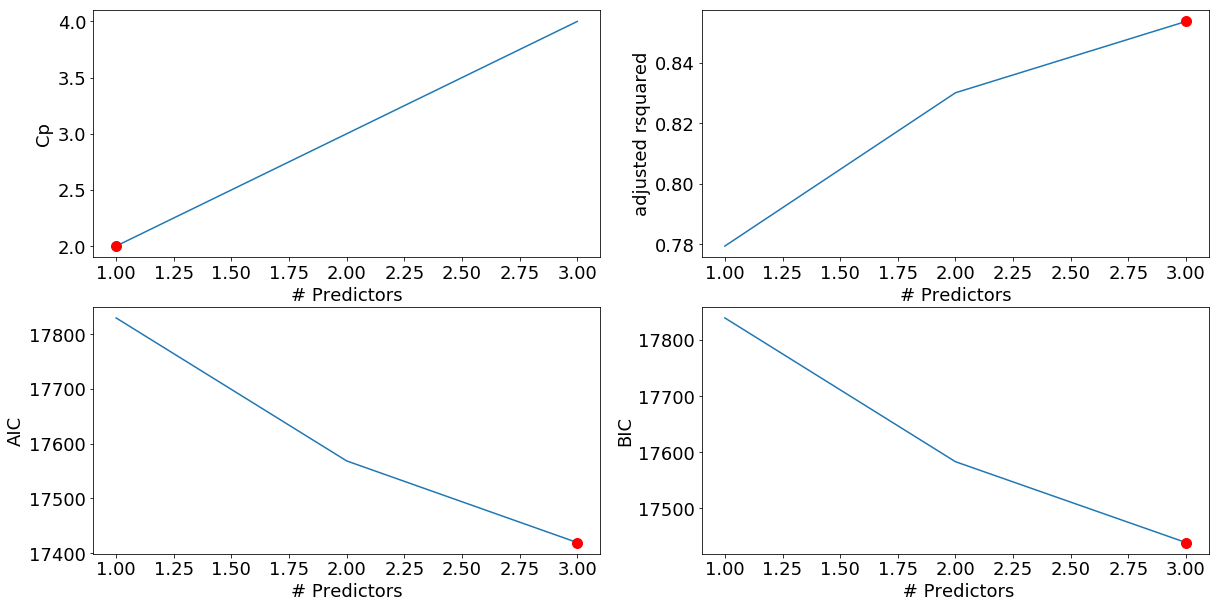

In [188]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [189]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [191]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [192]:
Forward_best_model = forward_model(X=train_x, y= train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':


Processed  36 models on 1 predictors in 0.028922319412231445
Selected predictors: ['Mfg_Year', 'const']  AIC: 17829.42978596831
Processed  35 models on 2 predictors in 0.03091740608215332
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17568.367338913245
Processed  34 models on 3 predictors in 0.028922557830810547
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17445.119591525512
Processed  33 models on 4 predictors in 0.032912254333496094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: 17325.975464754614
Processed  32 models on 5 predictors in 0.025930166244506836
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'const']  AIC: 17166.17257548417
Processed  31 models on 6 predictors in 0.024933576583862305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'const']  AIC: 17135.276404514785
Processed  30 models on 7 predictors in 0.0249328

In [194]:
Forward_best_model.aic

17004.91152095006

In [201]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     435.1
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:40:02   Log-Likelihood:                -8479.5
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     982   BIC:                         1.712e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1122.8948    131.113      8.564      0.000     865.600    1380.190
Automatic_airco   2359.7760    184.084     12.819      0.000    1998.532    2721.020
HP                  24.3360      3.530      6.893      0.000      17.408      31.264
Weight               9.6282      1.209      7.962      0.000       7.255      12.001
KM                  -0.0156      0.001    -11.197      0.000      -0.018      -0.013
Powered_Windows    367.2144     89.819      4.088      0.000     190.956     543.473
Quarterly_Tax       13.3254      1.938      6.875      0.000       9.522      17.129
Petrol            2340.1928    439.499      5.325      0.000    1477.727    3202.659
Guarantee_Period    59.6848     14.370      4.153      0.000      31.484      87.885
BOVAG_Guarantee    529.6526    132.015      4.012      0.000     270.588     788.717
Boardcomputer     -461.9661    126.324     -3.657      0.000    -709.861    -214.071
Age_08_04          -29.3969     10.893     -2.699      0.007     -50.774      -8.020
CD_Player          267.0560    105.092      2.541      0.011      60.826     473.286
Diesel            1406.2025    423.097      3.324      0.001     575.924    2236.481
ABS               -363.0046    107.219     -3.386      0.001    -573.409    -152.600
Sport_Model        307.4658     88.842      3.461      0.001     133.125     481.807
Automatic          436.1905    160.469      2.718      0.007     121.288     751.093
Airco              234.2628     92.554      2.531      0.012      52.636     415.890
Mfr_Guarantee      206.6819     77.817      2.656      0.008      53.975     359.389
Backseat_Divider  -270.0497    128.122     -2.108      0.035    -521.475     -18.625
Metallic_Rim       182.2444     96.471      1.889      0.059      -7.069     371.558
Tow_Bar           -149.0199     82.958     -1.796      0.073    -311.814      13.775
const            -2.249e+06   2.63e+05     -8.564      0.000   -2.76e+06   -1.73e+06
==============================================================================
Omnibus:                       90.636   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.258
Skew:                           0.024   Prob(JB):                    1.20e-120
Kurtosis:                       6.631   Cond. No.                     5.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [204]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [206]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [207]:
Backward_best_model = backward_model(X=train_x,y=train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 35 predictors in 0.06582379341125488
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: 17015.04676201871
Processed  35 models on 34 predictors in 0.06482696533203125
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', '

In [208]:
Backward_best_model.aic

17002.530825194335

# 단계적 선택법

In [210]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [211]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 1 predictors in 0.026928186416625977
Selected predictors: ['Mfg_Year', 'const']  AIC: 17829.42978596831
forward
Processed  1 models on 0 predictors in 0.0019943714141845703
Selected predictors: ['const']  AIC: 19347.389506323587
Processed  35 models on 2 predictors in 0.027925729751586914
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17568.367338913245
forward
Processed  2 models on 1 predictors in 0.0019948482513427734
Selected predictors: ['Mfg_Year', 'const']  AIC: 17829.42978596831
Processed  34 models on 3 predictors in 0.027925968170166016
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17445.119591525512
forward
Processed  3 models on 2 predictors in 0.003989219665527344
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17568.367338913245
Processed  33 models on 4 predictors in 0.032912492752075195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: 17325.975

Processed  18 models on 17 predictors in 0.025931119918823242
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Boardcomputer', 'Age_08_04', 'CD_Player', 'Diesel', 'ABS', 'Sport_Model', 'Automatic', 'const']  AIC: 17017.877869201748
Processed  18 models on 19 predictors in 0.029919862747192383
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Boardcomputer', 'Age_08_04', 'CD_Player', 'Diesel', 'ABS', 'Sport_Model', 'Automatic', 'Airco', 'Mfr_Guarantee', 'const']  AIC: 17009.82676044474
forward
Processed  19 models on 18 predictors in 0.025929927825927734
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Boardcomputer', 'Age_08_04', 'CD_Player', 'Diesel', 'ABS

Processed  14 models on 23 predictors in 0.01795172691345215
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Boardcomputer', 'Age_08_04', 'CD_Player', 'Diesel', 'ABS', 'Sport_Model', 'Automatic', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar', 'CNG', 'const']  AIC: 17004.911520950103
forward
Processed  23 models on 22 predictors in 0.03291201591491699
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Boardcomputer', 'Age_08_04', 'CD_Player', 'Diesel', 'ABS', 'Sport_Model', 'Automatic', 'Airco', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar', 'const']  AIC: 17004.91152095006
backward
Processed  14 models on 23 predictors in 0.01894974708557129
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_

In [212]:
Stepwise_best_model.aic

17004.91152095006

# 성능평가 

In [213]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (27,) (23,)


In [214]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [215]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [218]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [219]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.20969e+06  1.15366e+06  1.20972e+06  1.15366e+06
RMSE      1099.86      1074.09      1099.87      1074.09
MAE       791.486      775.884      789.485      775.884
MAPE      7.83001      7.69459      7.81251      7.69459


In [221]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
23
27
23
